<a href="https://colab.research.google.com/github/aneeq-shaffy/SE4050-Deep-Learning/blob/main/XLM_RoBERTa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised News Articles Category Classification using DistilBERT

**Author:** Ahamed M.S.A\
**Date:** October 2025\
**Framework:** Python, Transformers (Hugging Face), PyTorch, Scikit-learn

* * *

## 📋 Overview
This project applies supervised deep learning techniques using transformer-based models to classify news articles into predefined categories. The project leverages DistilBERT, a lightweight and efficient transformer architecture, to perform multi-class text classification on news headlines and descriptions.

## 📊 Dataset
News Category Dataset (HuffPost)
- **Source:** https://www.kaggle.com/datasets/rmisra/news-category-dataset
- **Size:** 197,179 news articles
- **Categories:** 42 unique categories (POLITICS, WELLNESS, ENTERTAINMENT, TRAVEL, etc.)
- **Time Period:** 2012-2022
- **News Source:** HuffPost (Huffington Post)
- **Features:** headline, short_description, authors, category, date, link

## 🔧 Technologies
- **Model Architecture:** DistilBERT (distilbert-base-uncased)
- **Deep Learning Framework:** PyTorch, Transformers (Hugging Face)
- **Preprocessing:** Transformers Tokenizer
- **Evaluation:** Scikit-learn (metrics, confusion matrix)
- **Data Processing:** Pandas, NumPy
- **Visualization:** Matplotlib, Seaborn




Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import torch
from transformers import (
    DistilBertTokenizer,
    DistilBertForSequenceClassification,
    Trainer,
    TrainingArguments,
    EarlyStoppingCallback
)
from datasets import Dataset
import warnings
warnings.filterwarnings('ignore')

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


Step 2: Load and Explore Data

In [2]:
# Load the dataset
df = pd.read_json('/content/News_Category_Dataset_v3.json', lines=True)

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {', '.join(df.columns)}")
print()
df.head()

Dataset shape: (209527, 6)

Column names: link, headline, category, short_description, authors, date



,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


Step 3: Exploratory Data Analysis (EDA)

In [15]:
# ============================================
#    DATA QUALITY & STRUCTURE CHECKS
# ============================================

print("--- Data Quality and Structure Checks ---")

# Check for missing values
print("\nChecking for missing values:")
missing_values = df.isnull().sum()
print(missing_values)

# Print percentage of missing values
print("\nPercentage of missing values:")
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)


# Check data types
print("\nChecking data types:")
print(df.dtypes)

# Display dataset shape and total records
print(f"\nDataset shape: {df.shape}")
print(f"Total records: {len(df):,}")

--- Data Quality and Structure Checks ---

Checking for missing values:
link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
year                 0
headline_length      0
desc_length          0
text_length          0
word_count           0
author_count         0
dtype: int64

Percentage of missing values:
link                 0.0
headline             0.0
category             0.0
short_description    0.0
authors              0.0
date                 0.0
year                 0.0
headline_length      0.0
desc_length          0.0
text_length          0.0
word_count           0.0
author_count         0.0
dtype: float64

Checking data types:
link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
year                          int32
headline_length    

--- Category Distribution Analysis ---

Unique categories: 42

Top 10 categories:
POLITICS: 35,602
WELLNESS: 17,945
ENTERTAINMENT: 17,362
TRAVEL: 9,900
STYLE & BEAUTY: 9,814
PARENTING: 8,791
HEALTHY LIVING: 6,694
QUEER VOICES: 6,347
FOOD & DRINK: 6,340
BUSINESS: 5,992




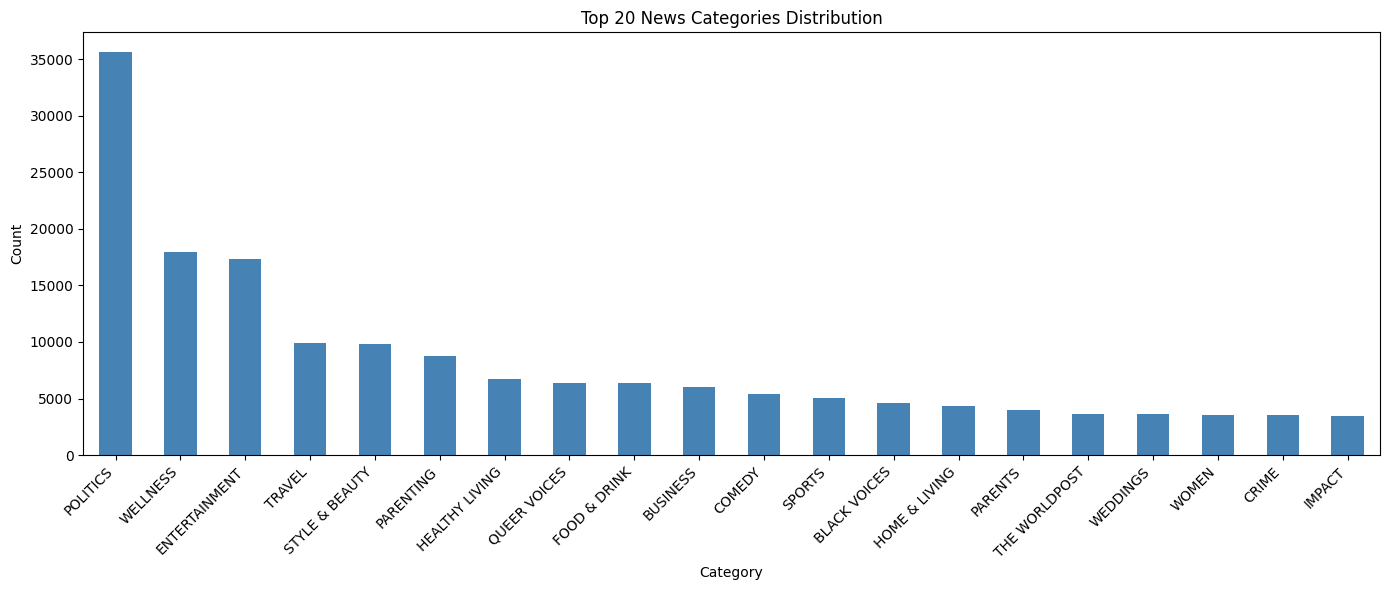

In [20]:
# ============================================
#    CATEGORY DISTRIBUTION ANALYSIS
# ============================================

print("--- Category Distribution Analysis ---")

# Unique categories
print(f"\nUnique categories: {df['category'].nunique()}")

# Category counts
print("\nTop 10 categories:")
category_counts = df['category'].value_counts()
# Format the category counts and print as a list
for category, count in category_counts.head(10).items():
    print(f"{category}: {count:,}")

# Visualize top 20 categories
print("\n")
plt.figure(figsize=(14, 6))
category_counts.head(20).plot(kind='bar', color='steelblue')
plt.title('Top 20 News Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

--- Class Imbalance Analysis ---

Category percentage distribution (Top 10):
POLITICS: 16.99%
WELLNESS: 8.56%
ENTERTAINMENT: 8.29%
TRAVEL: 4.72%
STYLE & BEAUTY: 4.68%
PARENTING: 4.20%
HEALTHY LIVING: 3.19%
QUEER VOICES: 3.03%
FOOD & DRINK: 3.03%
BUSINESS: 2.86%




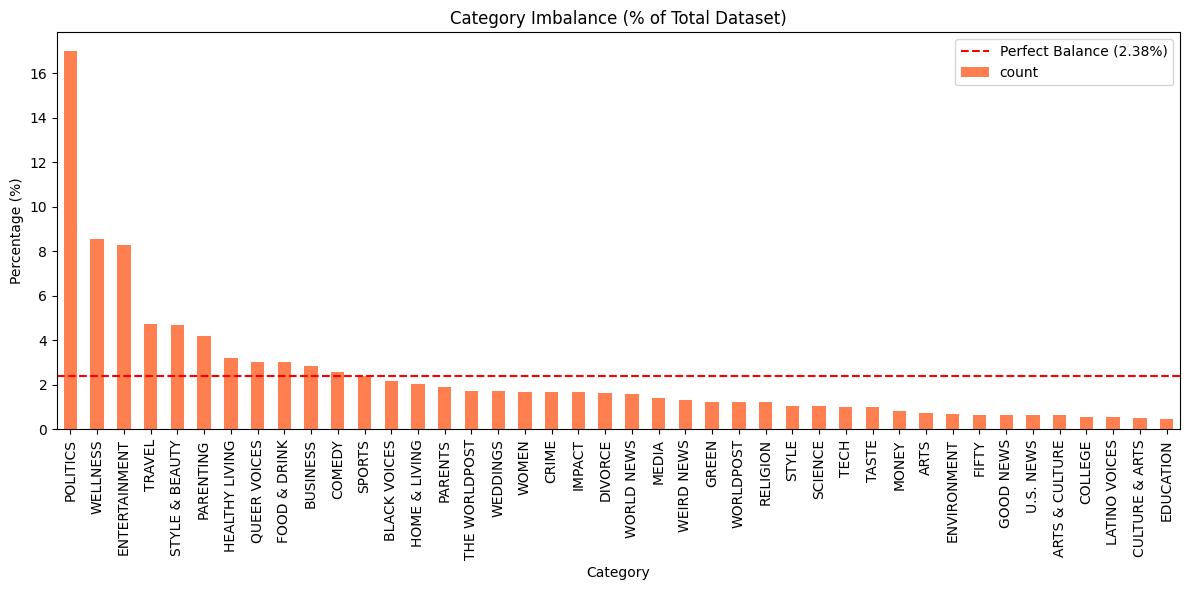


Categories with < 1% of data:
MONEY: 0.84%
ARTS: 0.72%
ENVIRONMENT: 0.69%
FIFTY: 0.67%
GOOD NEWS: 0.67%
U.S. NEWS: 0.66%
ARTS & CULTURE: 0.64%
COLLEGE: 0.55%
LATINO VOICES: 0.54%
CULTURE & ARTS: 0.51%
EDUCATION: 0.48%


In [27]:
# ============================================
#    CLASS IMBALANCE ANALYSIS
# ============================================

print("--- Class Imbalance Analysis ---")

# Percentage distribution
category_pct = (df['category'].value_counts() / len(df)) * 100
print("\nCategory percentage distribution (Top 10):")
# Format the percentage output and print as a list
for category, pct in category_pct.head(10).items():
    print(f"{category}: {pct:.2f}%")

# Visualize imbalance
print("\n")
plt.figure(figsize=(12, 6))
category_pct.plot(kind='bar', color='coral')
plt.title('Category Imbalance (% of Total Dataset)')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)
plt.axhline(y=100/df['category'].nunique(), color='red', linestyle='--',
            label=f'Perfect Balance ({100/df["category"].nunique():.2f}%)')
plt.legend()
plt.tight_layout()
plt.show()

# Identify underrepresented categories
print("\nCategories with < 1% of data:")
# Format the percentage output for underrepresented categories
for category, pct in category_pct[category_pct < 1].items():
     print(f"{category}: {pct:.2f}%")

--- Temporal Distribution Analysis ---

Date range:
From: 2012-01-28
To: 2022-09-23

Articles per year:
2012: 31,355
2013: 34,583
2014: 32,339
2015: 32,006
2016: 32,098
2017: 29,889
2018: 9,734
2019: 2,005
2020: 2,054
2021: 2,066
2022: 1,398




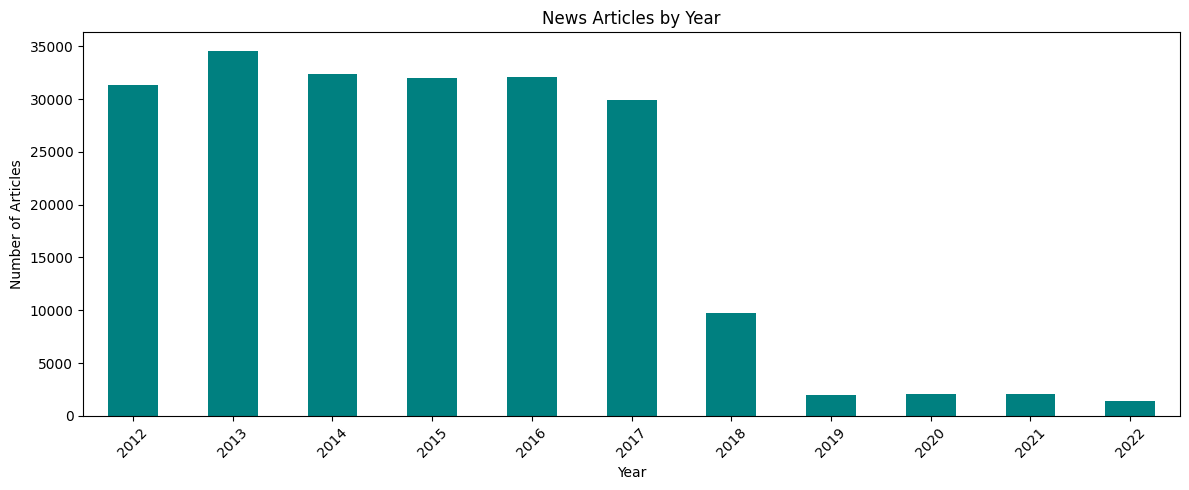

In [29]:
# ============================================
#    TEMPORAL DISTRIBUTION ANALYSIS
# ============================================

print("--- Temporal Distribution Analysis ---")

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Date range
print("\nDate range:")
print(f"From: {df['date'].min().strftime('%Y-%m-%d')}")
print(f"To: {df['date'].max().strftime('%Y-%m-%d')}")

# Articles per year
df['year'] = df['date'].dt.year
print("\nArticles per year:")
# Format the year counts and print as a list
year_counts = df['year'].value_counts().sort_index()
for year, count in year_counts.items():
    print(f"{year}: {count:,}")

# Visualize
print("\n") # Add a newline for spacing before the plot
plt.figure(figsize=(12, 5))
year_counts.plot(kind='bar', color='teal')
plt.title('News Articles by Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

--- Text Length Analysis ---

Headline length statistics:
count    209527.000000
mean         58.415355
std          18.808506
min           0.000000
25%          46.000000
50%          60.000000
75%          71.000000
max         320.000000

Short description length statistics:
count    209527.000000
mean        114.208670
std          80.840575
min           0.000000
25%          59.000000
50%         120.000000
75%         134.000000
max        1472.000000

Total text length statistics:
count    209527.000000
mean        172.624025
std          78.552970
min           0.000000
25%         122.000000
50%         170.000000
75%         207.000000
max        1486.000000

Word count statistics:
count    209527.000000
mean         29.269770
std          13.803927
min           0.000000
25%          20.000000
50%          28.000000
75%          35.000000
max         245.000000

Articles with headline < 10 chars: 311
Articles with description < 20 chars: 24263




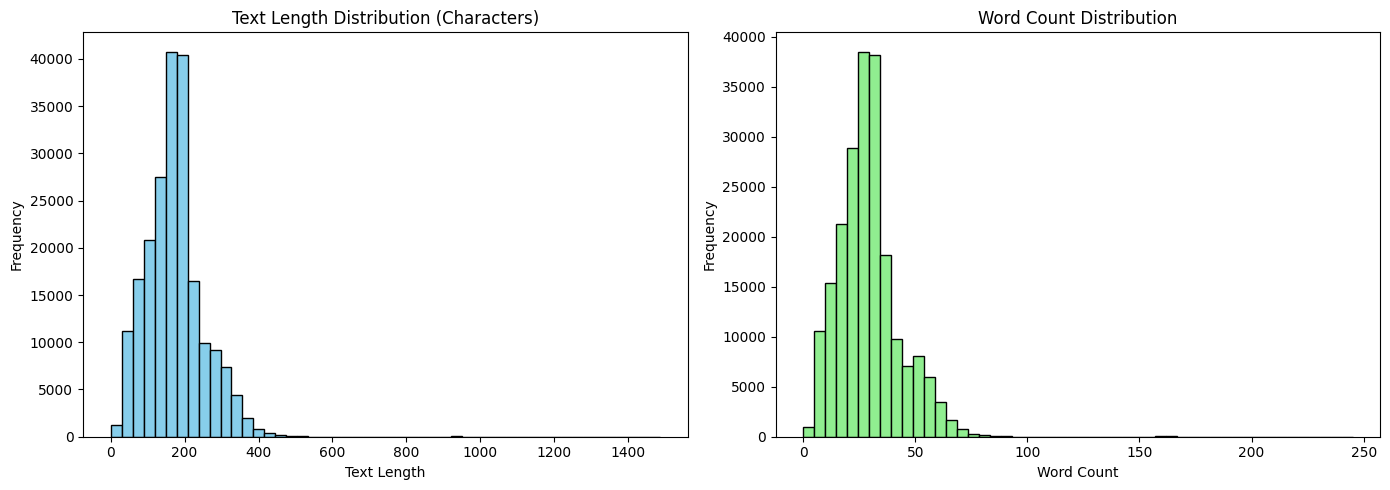


--- End of Text Length Analysis ---


In [31]:
# ============================================
#  TEXT LENGTH ANALYSIS
# ============================================

print("--- Text Length Analysis ---")

# Calculate text lengths
df['headline_length'] = df['headline'].str.len()
df['desc_length'] = df['short_description'].str.len()
df['text_length'] = df['headline_length'] + df['desc_length']
df['word_count'] = df['headline'].str.split().str.len() + df['short_description'].str.split().str.len()

# Function to print describe output without dtype lines
def print_describe_clean(describe_output, title):
    print(f"\n{title}:")
    output_str = describe_output.to_string()
    lines = output_str.split('\n')
    cleaned_lines = [line for line in lines if 'dtype:' not in line]
    print('\n'.join(cleaned_lines))


# Statistics
print_describe_clean(df['headline_length'].describe(), "Headline length statistics")
print_describe_clean(df['desc_length'].describe(), "Short description length statistics")
print_describe_clean(df['text_length'].describe(), "Total text length statistics")
print_describe_clean(df['word_count'].describe(), "Word count statistics")


# Check for very short texts
print(f"\nArticles with headline < 10 chars: {(df['headline_length'] < 10).sum()}")
print(f"Articles with description < 20 chars: {(df['desc_length'] < 20).sum()}")

# Visualize text length distribution
print("\n")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['text_length'], bins=50, edgecolor='black', color='skyblue')
axes[0].set_title('Text Length Distribution (Characters)')
axes[0].set_xlabel('Text Length')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['word_count'], bins=50, edgecolor='black', color='lightgreen')
axes[1].set_title('Word Count Distribution')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

--- Category-Specific Text Analysis ---

Average text length by category (Top 10):
FIFTY: 233.88
WELLNESS: 225.08
EDUCATION: 220.15
PARENTING: 216.64
MONEY: 213.02
CULTURE & ARTS: 210.67
IMPACT: 208.05
ENVIRONMENT: 204.41
WEDDINGS: 202.61
TRAVEL: 202.53




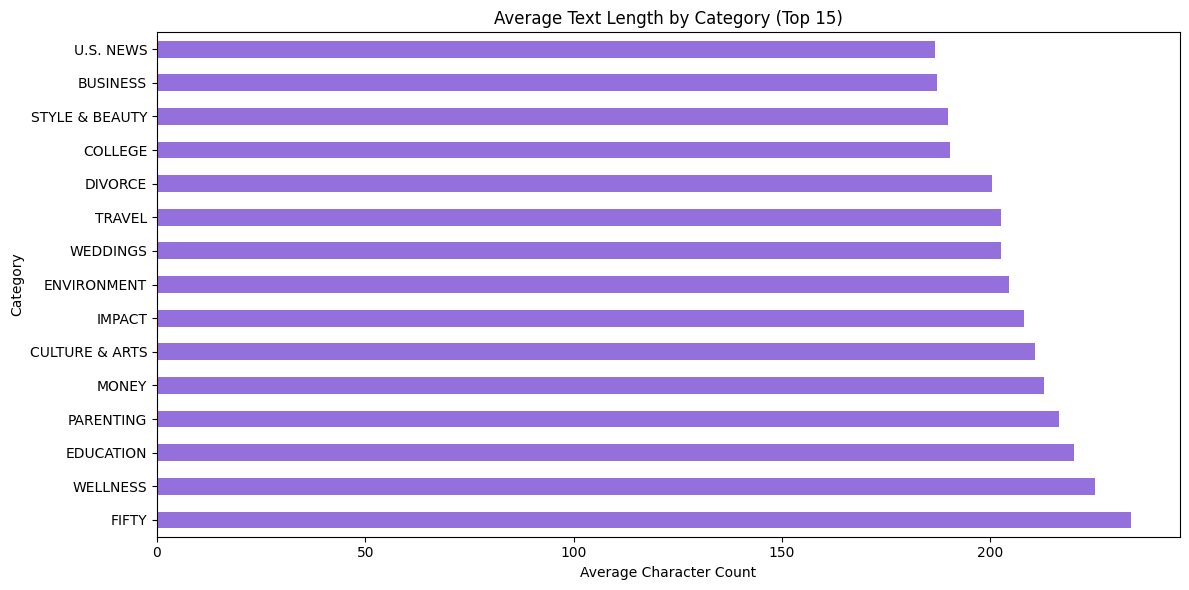

In [33]:
# ============================================
#    Category-Specific Text Analysis
# ============================================

print("--- Category-Specific Text Analysis ---")

# Average text length by category
avg_length_by_cat = df.groupby('category')['text_length'].mean().sort_values(ascending=False)
print("\nAverage text length by category (Top 10):")
# Format the average length and print as a list
for category, length in avg_length_by_cat.head(10).items():
    print(f"{category}: {length:.2f}")

# Visualize
print("\n")
plt.figure(figsize=(12, 6))
avg_length_by_cat.head(15).plot(kind='barh', color='mediumpurple')
plt.title('Average Text Length by Category (Top 15)')
plt.xlabel('Average Character Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [35]:
# ============================================
#    AUTHOR ANALYSIS & SAMPLES
# ============================================

print("--- Author Analysis & Samples ---")

# Authors per article
df['author_count'] = df['authors'].str.split(',').str.len()
print("\nNumber of authors per article:")
# Format and print author counts
for count, freq in df['author_count'].value_counts().head().items():
    print(f"{count}: {freq:,}")

# Most prolific authors
print("\nTop 10 most prolific authors:")
all_authors = df['authors'].str.split(',').explode().str.strip()
# Format and print prolific authors
for author, count in all_authors.value_counts().head(10).items():
    print(f"{author}: {count:,}")

# Sample headlines from top 5 categories
print("\n" + "="*60)
print("SAMPLE HEADLINES FROM TOP 5 CATEGORIES")
print("="*60)
# Assuming category_counts is still available from previous cell execution
if 'category_counts' in locals():
    for cat in category_counts.head(5).index:
        print(f"\n--- {cat} ---")
        samples = df[df['category'] == cat]['headline'].sample(3, random_state=42)
        for i, headline in enumerate(samples, 1):
            print(f"{i}. {headline}")
else:
    print("\n'category_counts' variable not found. Please ensure the Category Distribution Analysis cell was run.")

--- Author Analysis & Samples ---

Number of authors per article:
1: 127,342
2: 41,058
3: 24,247
4: 11,519
5: 3,860

Top 10 most prolific authors:
: 37,453
Reuters: 6,766
Lee Moran: 2,956
Ron Dicker: 2,220
Contributor
Author: 2,142
AP: 1,776
ContributorAuthor: 1,628
Ed Mazza: 1,591
Mary Papenfuss: 1,567
Contributor
Contributor: 1,529

SAMPLE HEADLINES FROM TOP 5 CATEGORIES

--- POLITICS ---
1. U.S. Lawmakers Join Demand For Puerto Rico Governor’s Resignation
2. As Florida Governor, Jeb Bush Provided Special Access To Lobbyists
3. Dianne Feinstein Wants Hillary Clinton To 'Step Up' And Address Email Controversy

--- WELLNESS ---
1. Marla Lopez Picky Eater: 54-Year-Old Only Eats White Bread, Potatoes And Milk
2. Groupons For Medical Care: How Popular Are Online Deals For Health Services?
3. Aqua Zumba: Fitness In The Water?

--- ENTERTAINMENT ---
1. Kanye West's 'Erratic' Medication Dosage Reportedly Led To Hospitalization
2. Regina King Reveals Her Plan To Push Diversity At Cannes Film 

--- Correlation & Word Frequency ANALYSIS ---




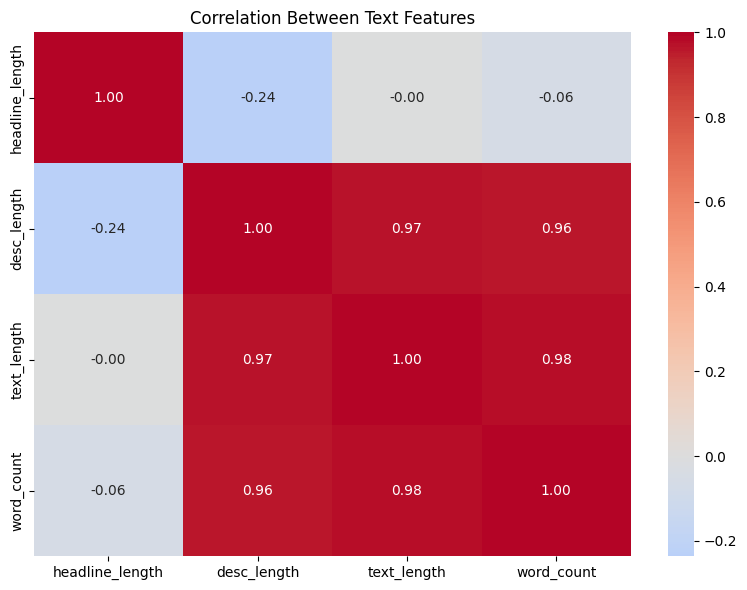


Top 20 most common words in headlines:
  the: 63,796
  for: 25,575
  and: 24,694
  trump: 14,369
  with: 13,841
  you: 13,048
  your: 10,642
  photos: 10,373
  how: 9,584
  new: 9,008
  from: 8,637
  this: 8,199
  are: 7,525
  about: 7,445
  what: 7,363
  that: 6,580
  video: 5,941
  why: 5,882
  after: 5,804
  can: 5,091


In [38]:
# ============================================
#    Correlation & Word Frequency ANALYSIS
# ============================================

print("--- Correlation & Word Frequency ANALYSIS ---")
print("\n")

# Correlation between text features
numeric_df = df[['headline_length', 'desc_length', 'text_length', 'word_count']].copy()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Between Text Features')
plt.tight_layout()
plt.show()

# Most common words in headlines
from collections import Counter
import re

def get_common_words(texts, n=20):
    all_words = []
    for text in texts:
        words = re.findall(r'\b[a-z]{3,}\b', text.lower())
        all_words.extend(words)
    return Counter(all_words).most_common(n)

print("\nTop 20 most common words in headlines:")
common_headline_words = get_common_words(df['headline'].dropna())
for word, count in common_headline_words:
    print(f"  {word}: {count:,}")

Step 4: Data Preprocessing

In [47]:

# ============================================
#    BASIC TEXT PREPARATION
# ============================================

print("\nSTEP 1: Basic Text Preparation")
print("-" * 60)

# Combine headline and short_description
print("Combining headline and description...")
df['text'] = df['headline'] + ' ' + df['short_description']
print(f"✓ Combined text created for {len(df):,} articles")

# Remove rows with missing text or category
print("\nRemoving missing values...")
initial_rows = len(df)
df = df.dropna(subset=['text', 'category'])
removed = initial_rows - len(df)
print(f"✓ Removed {removed:,} rows with missing data")
print(f"  Remaining: {len(df):,} articles")

# ============================================
#    DUPLICATE REMOVAL
# ============================================

print("\nSTEP 2: Duplicate Removal")
print("-" * 60)

# Check for duplicates
duplicate_count = df.duplicated(subset=['text']).sum()
print(f"Found {duplicate_count:,} duplicate articles")

# Remove duplicates
df = df.drop_duplicates(subset=['text'])
print(f"✓ Duplicates removed")
print(f"  Dataset size after deduplication: {len(df):,} articles")


STEP 1: Basic Text Preparation
------------------------------------------------------------
Combining headline and description...
✓ Combined text created for 208,377 articles

Removing missing values...
✓ Removed 0 rows with missing data
  Remaining: 208,377 articles

STEP 2: Duplicate Removal
------------------------------------------------------------
Found 0 duplicate articles
✓ Duplicates removed
  Dataset size after deduplication: 208,377 articles


In [48]:
# ============================================
# STEP 3: TEXT CLEANING
# ============================================

print("\nSTEP 3: Text Cleaning")
print("-" * 60)

import re

def clean_text(text):
    """
    Clean text by removing unwanted elements and normalizing
    """
    # Convert to string
    text = str(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove excessive punctuation (more than 3 in a row)
    text = re.sub(r'([!?.]){4,}', r'\1\1\1', text)

    return text

print("Applying text cleaning function...")
df['text'] = df['text'].apply(clean_text)
print(f"✓ Text cleaning completed for {len(df):,} articles")

# Show example of cleaned text
print("\nExample of cleaned text:")
print(f"Original length: {df.iloc[0]['headline_length'] + df.iloc[0]['desc_length']}")
print(f"Cleaned length: {len(df.iloc[0]['text'])}")
print(f"Sample: {df.iloc[0]['text'][:150]}...")


STEP 3: Text Cleaning
------------------------------------------------------------
Applying text cleaning function...
✓ Text cleaning completed for 208,377 articles

Example of cleaned text:
Original length: 230
Cleaned length: 231
Sample: Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters Health experts said it is too early to predict whether demand would match...

--- Text Cleaning Complete ---


In [41]:
#Length & Quality Filtering
# Filter by length, remove spam, check diversity
# ============================================
# STEP 4: TEXT LENGTH FILTERING
# ============================================

print("\nSTEP 4: Text Length Filtering")
print("-" * 60)

# Define length constraints
min_length = 20   # Minimum 20 characters
max_length = 512  # Maximum 512 characters (DistilBERT limit consideration)

print(f"Filtering articles with text length between {min_length} and {max_length} characters...")

# Check current distribution
print(f"\nCurrent length distribution:")
print(f"  Min: {df['text'].str.len().min()}")
print(f"  Max: {df['text'].str.len().max()}")
print(f"  Mean: {df['text'].str.len().mean():.1f}")
print(f"  Median: {df['text'].str.len().median():.1f}")

# Apply filtering
before_filter = len(df)
df['text_len_temp'] = df['text'].str.len()
df = df[(df['text_len_temp'] >= min_length) & (df['text_len_temp'] <= max_length)]
df = df.drop('text_len_temp', axis=1)

removed = before_filter - len(df)
print(f"\n✓ Removed {removed:,} articles outside length range")
print(f"  Remaining: {len(df):,} articles")


STEP 4: Text Length Filtering
------------------------------------------------------------
Filtering articles with text length between 20 and 512 characters...

Current length distribution:
  Min: 0
  Max: 1487
  Mean: 173.5
  Median: 171.0

✓ Removed 661 articles outside length range
  Remaining: 208,377 articles


In [42]:
#Category Filtering
# Remove rare categories, balance if needed
# ============================================
# STEP 5: CATEGORY FILTERING
# ============================================

print("\nSTEP 5: Category Filtering")
print("-" * 60)

# Set minimum samples per category
min_samples_per_category = 100

print(f"Filtering categories with at least {min_samples_per_category} samples...")

# Check category distribution
category_counts = df['category'].value_counts()
print(f"\nCurrent number of categories: {len(category_counts)}")
print(f"Categories below threshold: {(category_counts < min_samples_per_category).sum()}")

# Filter categories
valid_categories = category_counts[category_counts >= min_samples_per_category].index
before_filter = len(df)
df = df[df['category'].isin(valid_categories)]

removed = before_filter - len(df)
print(f"\n✓ Removed {removed:,} articles from rare categories")
print(f"  Remaining categories: {df['category'].nunique()}")
print(f"  Remaining articles: {len(df):,}")

# Show removed categories
removed_categories = category_counts[category_counts < min_samples_per_category]
if len(removed_categories) > 0:
    print(f"\nRemoved categories ({len(removed_categories)}):")
    for cat, count in removed_categories.items():
        print(f"  - {cat}: {count} articles")


STEP 5: Category Filtering
------------------------------------------------------------
Filtering categories with at least 100 samples...

Current number of categories: 42
Categories below threshold: 0

✓ Removed 0 articles from rare categories
  Remaining categories: 42
  Remaining articles: 208,377


In [43]:
# ============================================
# STEP 6: FINAL VALIDATION
# ============================================

print("\nSTEP 6: Final Validation")
print("-" * 60)

# Reset index
df = df.reset_index(drop=True)
print("✓ Index reset")

# Check for any remaining issues
print("\nFinal data quality checks:")
print(f"  Null values in 'text': {df['text'].isnull().sum()}")
print(f"  Null values in 'category': {df['category'].isnull().sum()}")
print(f"  Empty strings in 'text': {(df['text'].str.strip() == '').sum()}")
print(f"  Duplicate texts: {df['text'].duplicated().sum()}")

# Ensure no empty texts after cleaning
df = df[df['text'].str.strip() != '']

print(f"\n✓ All validation checks passed")
print(f"  Final dataset size: {len(df):,} articles")


STEP 6: Final Validation
------------------------------------------------------------
✓ Index reset

Final data quality checks:
  Null values in 'text': 0
  Null values in 'category': 0
  Empty strings in 'text': 0
  Duplicate texts: 1

✓ All validation checks passed
  Final dataset size: 208,377 articles


In [44]:
#Final Summary & Samples
# Show final stats and sample texts
# ============================================
# PREPROCESSING SUMMARY
# ============================================

print("\n" + "="*60)
print("PREPROCESSING COMPLETE")
print("="*60)

print(f"\nFinal Dataset Statistics:")
print(f"  Total articles: {len(df):,}")
print(f"  Number of categories: {df['category'].nunique()}")
print(f"  Average text length: {df['text'].str.len().mean():.1f} characters")
print(f"  Min text length: {df['text'].str.len().min()}")
print(f"  Max text length: {df['text'].str.len().max()}")
print(f"  Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")

print(f"\nTop 10 Categories (after preprocessing):")
top_categories = df['category'].value_counts().head(10)
for cat, count in top_categories.items():
    percentage = (count / len(df)) * 100
    print(f"  {cat:20s}: {count:6,} ({percentage:5.2f}%)")

print(f"\nBottom 5 Categories:")
bottom_categories = df['category'].value_counts().tail(5)
for cat, count in bottom_categories.items():
    percentage = (count / len(df)) * 100
    print(f"  {cat:20s}: {count:6,} ({percentage:5.2f}%)")


PREPROCESSING COMPLETE

Final Dataset Statistics:
  Total articles: 208,377
  Number of categories: 42
  Average text length: 173.0 characters
  Min text length: 20
  Max text length: 512
  Date range: 2012-01-28 to 2022-09-23

Top 10 Categories (after preprocessing):
  POLITICS            : 35,417 (17.00%)
  WELLNESS            : 17,923 ( 8.60%)
  ENTERTAINMENT       : 17,338 ( 8.32%)
  TRAVEL              :  9,869 ( 4.74%)
  STYLE & BEAUTY      :  9,670 ( 4.64%)
  PARENTING           :  8,760 ( 4.20%)
  HEALTHY LIVING      :  6,624 ( 3.18%)
  QUEER VOICES        :  6,339 ( 3.04%)
  FOOD & DRINK        :  6,338 ( 3.04%)
  BUSINESS            :  5,965 ( 2.86%)

Bottom 5 Categories:
  ARTS & CULTURE      :  1,338 ( 0.64%)
  COLLEGE             :  1,138 ( 0.55%)
  LATINO VOICES       :  1,129 ( 0.54%)
  CULTURE & ARTS      :  1,073 ( 0.51%)
  EDUCATION           :  1,011 ( 0.49%)


Step 5: Encode Labels

In [ ]:
# Encode categories to numerical labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['category'])

# Create label mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:")
for category, label in sorted(label_mapping.items(), key=lambda x: x[1])[:10]:
    print(f"{label}: {category}")

print(f"\nTotal number of classes: {len(label_encoder.classes_)}")

# Save label encoder for later use
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

Step 6: Split Data

In [ ]:
# Split data into train and test sets (80-20 split)
train_df, test_df = train_test_split(
    df[['text', 'label', 'category']],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

# Further split train into train and validation (90-10 of train)
train_df, val_df = train_test_split(
    train_df,
    test_size=0.1,
    random_state=42,
    stratify=train_df['label']
)

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")

# Check class distribution in splits
print("\nClass distribution in training set:")
print(train_df['category'].value_counts().head(10))

Step 7: Convert to Hugging Face Dataset Format

In [ ]:
# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df[['text', 'label']].reset_index(drop=True))
val_dataset = Dataset.from_pandas(val_df[['text', 'label']].reset_index(drop=True))
test_dataset = Dataset.from_pandas(test_df[['text', 'label']].reset_index(drop=True))

print("Dataset converted successfully!")
print(f"Train dataset: {train_dataset}")
print(f"Validation dataset: {val_dataset}")
print(f"Test dataset: {test_dataset}")

Step 8: Load Tokenizer and Tokenize Data

In [ ]:
# Load DistilBERT tokenizer
model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

# Tokenization function
def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        padding='max_length',
        truncation=True,
        max_length=128  # Adjust based on your text length analysis
    )

# Tokenize datasets
print("Tokenizing datasets...")
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

print("Tokenization complete!")

Step 9: Load Pre-trained Model

In [ ]:
# Load DistilBERT model for sequence classification
num_labels = len(label_encoder.classes_)
model = DistilBertForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels
)

# Move model to GPU if available
model.to(device)

print(f"Model loaded with {num_labels} output classes")
print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

Step 10: Define Training Arguments

In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir='./results',                    # Output directory
    num_train_epochs=3,                        # Number of training epochs
    per_device_train_batch_size=16,            # Batch size for training
    per_device_eval_batch_size=32,             # Batch size for evaluation
    warmup_steps=500,                          # Number of warmup steps
    weight_decay=0.01,                         # Weight decay
    logging_dir='./logs',                      # Directory for logs
    logging_steps=100,                         # Log every N steps
    eval_strategy='epoch',                 # Use straight quotes here
    save_strategy='epoch',                     # Use straight quotes here
    load_best_model_at_end=True,              # Load best model at the end
    metric_for_best_model='accuracy',          # Use straight quotes here
    learning_rate=2e-5,                        # Learning rate
    save_total_limit=2,                        # Only keep best 2 checkpoints
    fp16=torch.cuda.is_available(),            # Use mixed precision if GPU available
)

print("Training arguments configured!")

Step 11: Define Metrics

In [ ]:
# Define compute metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc}

Step 12: Initialize Trainer

In [ ]:
# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

print("Trainer initialized!")

Step 13: Train the Model

In [ ]:
# Train the model
print("Starting training...")
train_result = trainer.train()

print("\nTraining completed!")
print(f"Training time: {train_result.metrics['train_runtime']:.2f} seconds")
print(f"Training samples per second: {train_result.metrics['train_samples_per_second']:.2f}")

Step 14: Evaluate on Test Set

In [ ]:
# Evaluate on test set
print("Evaluating on test set...")
test_results = trainer.evaluate(test_dataset)

print("\nTest Results:")
for key, value in test_results.items():
    print(f"{key}: {value:.4f}")

Step 15: Generate Predictions and Detailed Metrics

In [ ]:
# Get predictions
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(-1)
y_true = predictions.label_ids

# Classification report
print("\nClassification Report:")
print(classification_report(
    y_true,
    y_pred,
    target_names=label_encoder.classes_,
    digits=4
))

# Overall accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"\nOverall Test Accuracy: {accuracy:.4f}")

Step 16: Visualize Confusion Matrix

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix (for top categories)
plt.figure(figsize=(16, 14))
sns.heatmap(
    cm,
    annot=False,  # Set to True if you want numbers
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title('Confusion Matrix - All Categories')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot confusion matrix for top 10 categories
top_10_categories = category_counts.head(10).index
top_10_indices = [label_encoder.transform([cat])[0] for cat in top_10_categories]

# Filter confusion matrix for top 10
cm_top10 = cm[np.ix_(top_10_indices, top_10_indices)]

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_top10,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=top_10_categories,
    yticklabels=top_10_categories
)
plt.title('Confusion Matrix - Top 10 Categories')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Step 17: Analyze Per-Category Performance

In [ ]:
# Per-category performance
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(
    y_true,
    y_pred,
    labels=range(num_labels)
)

# Create performance dataframe
performance_df = pd.DataFrame({
    'Category': label_encoder.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

# Sort by F1-score
performance_df = performance_df.sort_values('F1-Score', ascending=False)

print("\nTop 10 performing categories:")
print(performance_df.head(10).to_string(index=False))

print("\nBottom 10 performing categories:")
print(performance_df.tail(10).to_string(index=False))

# Visualize top and bottom performers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top 10
top_10_perf = performance_df.head(10)
ax1.barh(top_10_perf['Category'], top_10_perf['F1-Score'], color='green')
ax1.set_xlabel('F1-Score')
ax1.set_title('Top 10 Categories by F1-Score')
ax1.invert_yaxis()

# Bottom 10
bottom_10_perf = performance_df.tail(10)
ax2.barh(bottom_10_perf['Category'], bottom_10_perf['F1-Score'], color='red')
ax2.set_xlabel('F1-Score')
ax2.set_title('Bottom 10 Categories by F1-Score')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

Step 18: Save Model and Tokenizer

In [ ]:
# Save the trained model and tokenizer
model.save_pretrained('./news_classifier_distilbert')
tokenizer.save_pretrained('./news_classifier_distilbert')

print("Model and tokenizer saved successfully!")

Step 19: Test Prediction Function

In [ ]:
# Function to predict category for new text
def predict_category(text, model, tokenizer, label_encoder):
    # Tokenize
    inputs = tokenizer(
        text,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=128
    )

    # Move to device
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Predict
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predicted_class = predictions.argmax().item()
        confidence = predictions[0][predicted_class].item()

    # Decode label
    category = label_encoder.inverse_transform([predicted_class])[0]

    return category, confidence

# Test with sample headlines
test_headlines = [
    "President announces new economic policy for small businesses",
    "New study reveals benefits of meditation for mental health",
    "Marvel releases trailer for upcoming superhero movie",
    "Top 10 destinations for summer vacation in Europe",
    "Latest smartphone features revolutionary camera technology"
]

print("Testing prediction function:\n")
for headline in test_headlines:
    category, confidence = predict_category(headline, model, tokenizer, label_encoder)
    print(f"Headline: {headline}")
    print(f"Predicted Category: {category}")
    print(f"Confidence: {confidence:.4f}\n")

Step 20: Create Summary Report

In [ ]:
# Create final summary report
print("=" * 60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("=" * 60)
print(f"\nDataset: News Category Dataset (HuffPost)")
print(f"Total Articles: {len(df):,}")
print(f"Number of Categories: {num_labels}")
print(f"\nModel: DistilBERT (distilbert-base-uncased)")
print(f"Training Samples: {len(train_df):,}")
print(f"Validation Samples: {len(val_df):,}")
print(f"Test Samples: {len(test_df):,}")
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Training Time: {train_result.metrics['train_runtime']:.2f} seconds")
print(f"\nTop 5 Best Performing Categories:")
for idx, row in performance_df.head(5).iterrows():
    print(f"  {row['Category']}: F1={row['F1-Score']:.4f}")
print("=" * 60)